In [291]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import defaultdict

In [292]:
def generate_maze(X, Y, objects, probability):
    #Funtion that generates random maze with set of objects that have given probability
    #of appearing. Start (x=0,y=0) and end (x=X,y=Y) points always have to be white (walkable)
        if len(objects) != len(probability):
            print(f'[Error] Objects and probability have different number of items.')
            return None
        elif np.sum(probability) != 1.0:
            print(f'[Error] Sum of probabilities does not equal 1.0.')
            return None
        else:
            maze = np.random.choice(objects,(X,Y),p=probability)
            maze[0,0] = 0
            maze[X-1,Y-1] = 0
            return maze

In [293]:
X, Y = 8, 10
maze = generate_maze(X,Y,[0,1],[0.8,0.2])

In [294]:
allowed_actions = {'D':[1,0],'U':[-1,0],'R':[0,1],'L':[0,-1]}
special_points = {0:1,1:100}

In [439]:
class Maze:
    def __init__(self, maze,specials_points={0:1,1:100}):
        self.maze = maze
        self.special_points = specials_points       #Dict containing points for each of the objects
        self.Y,self.X = [i-1 for i in maze.shape]   #Size of maze -1 because we start from (0,0)
        self.robot_position = (0,0)                 #Current position of robot
        self.steps = []                             #All steps taken by robot
        self.score = 0
        self.allowed_steps = defaultdict(list)      #List of allowed stapes
        self.find_allowed_steps()                   #Construct dict of possible steps along with cost

    def check_move(self, y, x, action):
        y += allowed_actions[action][0]
        x += allowed_actions[action][1]

        if x < 0 or y < 0 or x > self.X or y > self.Y:
            return False
        else:
            return True
    
    def move_value(self, y, x, action):
        y += allowed_actions[action][0]
        x += allowed_actions[action][1]
        return self.special_points[self.maze[y,x]]
    
    def check_game_over(self):
        if self.robot_position == (self.Y,self.X):
            return True
        else:
            return False
    
    def find_allowed_steps(self):
        print(self.maze)
        for y in range(self.Y+1):
            for x in range(self.X+1):
                for action in allowed_actions:
                    if self.check_move(y,x,action):
                        self.allowed_steps[(y,x)].append(action)
    
    def print_allowed_steps(self):
        string_size = 30
        print('|' + '-'*(string_size-1))
        for k, v in self.allowed_steps.items():
            string = f'Position: {k[0]},{k[1]}'
            for action in v:
                string += '\n'
                string += f'|   |- {action} -> Cost: {self.move_value(k[0],k[1],action)}'
            print('|-' + string)
        print('|' + '-'*(string_size-1))
        return self.allowed_steps

    def update_maze(self,action):
        y, x = self.robot_position
        if self.check_move(y, x, action):
            self.score += self.move_value(y,x,action)
            y += allowed_actions[action][0]
            x += allowed_actions[action][1]
            self.robot_position = (y,x)
            self.steps.append(action)
            print(self.score)
        else:
            print('Move inposible.')
    
    def show_maze(self):
        cmap = colors.ListedColormap(['white','red','black','grey','darkred','green','yellow','cyan'])
        bounds = [0,1,2,3,4,5,6,7]
        norm = colors.BoundaryNorm(bounds,cmap.N)
        maze_copy = self.maze.copy()
        maze_copy[self.robot_position] = 2
        y, x = (0,0)
        for action in self.steps:
            y += allowed_actions[action][0]
            x += allowed_actions[action][1]
            maze_copy[(y,x)] += 3
        plt.figure()
        im = plt.imshow(maze_copy,interpolation='none', aspect='equal',
                        cmap=cmap,norm=norm)
        ax = plt.gca()
        # Major ticks
        ax.set_xticks(np.arange(0, self.X+1, 1))
        ax.set_yticks(np.arange(0, self.Y+1, 1))
        # # Labels for major ticks
        # ax.set_xticklabels(np.arange(0, self.X+1, 1))
        # ax.set_yticklabels(np.arange(0, self.Y+1, 1))
        # # Minor ticks
        ax.set_xticks(np.arange(-.5, self.X+1, 1), minor=True)
        ax.set_yticks(np.arange(-.5, self.Y+1, 1), minor=True)
        # Gridlines based on minor ticks
        ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
        # Remove minor ticks
        ax.tick_params(which='minor', bottom=False, left=False)

In [440]:
game = Maze(maze,special_points)

[[0 0 0 1 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


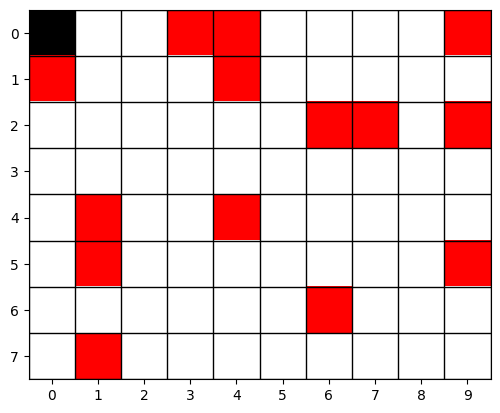

In [441]:
game.show_maze()

In [442]:
steps = game.print_allowed_steps()

|-----------------------------
|-Position: 0,0
|   |- D -> Cost: 100
|   |- R -> Cost: 1
|-Position: 0,1
|   |- D -> Cost: 1
|   |- R -> Cost: 1
|   |- L -> Cost: 1
|-Position: 0,2
|   |- D -> Cost: 1
|   |- R -> Cost: 100
|   |- L -> Cost: 1
|-Position: 0,3
|   |- D -> Cost: 1
|   |- R -> Cost: 100
|   |- L -> Cost: 1
|-Position: 0,4
|   |- D -> Cost: 100
|   |- R -> Cost: 1
|   |- L -> Cost: 100
|-Position: 0,5
|   |- D -> Cost: 1
|   |- R -> Cost: 1
|   |- L -> Cost: 100
|-Position: 0,6
|   |- D -> Cost: 1
|   |- R -> Cost: 1
|   |- L -> Cost: 1
|-Position: 0,7
|   |- D -> Cost: 1
|   |- R -> Cost: 1
|   |- L -> Cost: 1
|-Position: 0,8
|   |- D -> Cost: 1
|   |- R -> Cost: 100
|   |- L -> Cost: 1
|-Position: 0,9
|   |- D -> Cost: 1
|   |- L -> Cost: 1
|-Position: 1,0
|   |- D -> Cost: 1
|   |- U -> Cost: 1
|   |- R -> Cost: 1
|-Position: 1,1
|   |- D -> Cost: 1
|   |- U -> Cost: 1
|   |- R -> Cost: 1
|   |- L -> Cost: 100
|-Position: 1,2
|   |- D -> Cost: 1
|   |- U -> Cost: 1
|   |

Move inposible.


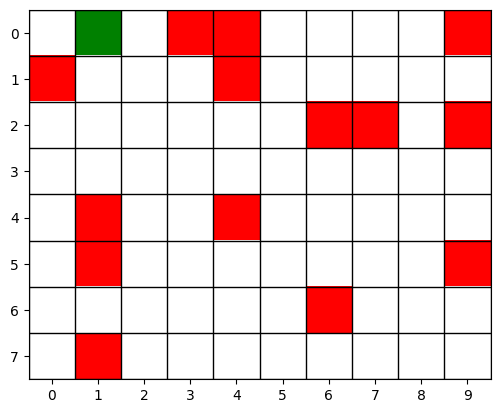

In [444]:
game.update_maze("U")
game.show_maze()